In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(thing):
    plt.imshow(thing.reshape(32,32),interpolation="nearest")
    plt.show()

In [3]:
def sign(x):
    if x >= 0:
        x = 1
    else:
        x = -1
    return x

            
class hopfield():
    def __init__(self, size, npatterns, trainX):
        self.W = np.zeros([npatterns,npatterns])
        self.size = size
        self.npatterns = npatterns
        
        x1=([-1, -1, 1, -1, 1, -1, -1, 1])
        x2=([-1, -1, -1, -1, -1, 1, -1, -1])
        x3=([-1, 1, 1, -1, -1, 1, -1, 1])
        
        self.X = trainX
    
    def calc_weights(self):
        for x in self.X:
            self.W += np.outer(x,x)
        for i in range(self.npatterns):
            self.W[i,i] = 0
#         print(self.W)
    
    def update_x(self, x, W):
#         print("len = ", len(x))
        for i in range(len(x[0])):
#             print("before ", np.dot(x,W[i,:]))
            x[0,i] = sign(np.dot(x,W[i,:]))
#             print("after", sign(np.dot(x,W[i,:])))
        return x

    def update_batch(self,x):
        new = np.dot(x,self.W)
        new[new>=0] = 1
        new[new<0] = -1
        return new
    
    def update_random(self,x):
        new = x.copy()
        n_dims = x.shape[0]
        for i in range(n_dims):
            unit = np.random.randint(0,n_dims)
            xsum = 0
            for j in range(n_dims):
                xsum += np.multiply(self.W[unit][j], new[j])
            new[unit] = sign(xsum)
            
        return new
            
    def train(self):       
        self.calc_weights()            
#         self.update_x(x,self.W)
    
    def recall(self, x, n_epochs):
        for epoch in range(n_epochs):
            x = self.update_x(x, self.W)
#             print(x)
        return x

    def recall_batch(self,x):
        error = 1
        iters = 0
        
        while error > 0:
            new = self.update_batch(x)
            error = sum(abs(new-x))
            x = new.copy()
        
        print("iters: " + str(iters))
        return x
    
    def recall_random(self,x, max_iter=15):
        error = 1
        iters = 0
        
        while error > 0:
#             print(iters)
            new = self.update_random(x)
            error = sum(abs(new-x))
            x = new.copy()
            iters+=1
            if(iters > max_iter):
                break
        
        print("iters: " + str(iters))
        return x
 
 

In [4]:
pictData = np.loadtxt('pict.dat',delimiter=",", dtype=int).reshape(-1,1024)
print(pictData.shape)
train_X = pictData[0:3].copy()

hopfield_net = hopfield(train_X.shape[0],train_X.shape[1],train_X)
hopfield_net.train()

(11, 1024)


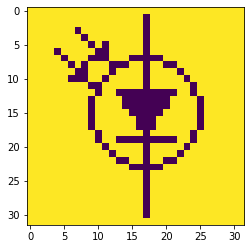

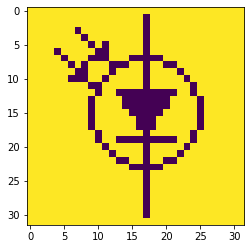

In [5]:
c_test = train_X[2]
test = hopfield_net.update_batch(c_test)

plt.imshow(c_test.reshape(32,32),interpolation="nearest")
plt.show()
plt.imshow(test.reshape(32,32),interpolation="nearest")
plt.show()

(1024,)
iters: 0


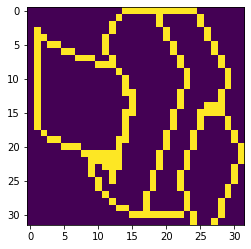

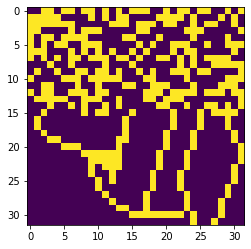

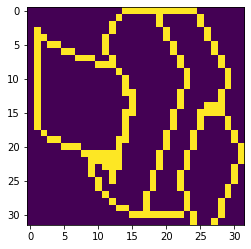

In [6]:
c_test = pictData[9]
print(c_test.shape)
recall = hopfield_net.recall_batch(c_test)
#Plot picture 1
plot(train_X[0])
#Plot picture 10, degraded version of picture 1
plot(c_test)
#Plot output of HebianNet on picture 11
plot(recall)

(1024,)
iters: 6


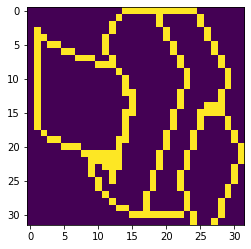

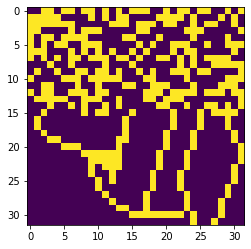

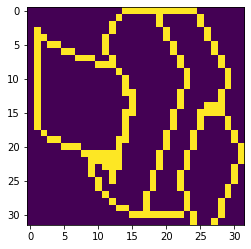

In [8]:
c_test = pictData[9]
print(c_test.shape)
recall = hopfield_net.recall_random(c_test)
#Plot picture 1
plot(train_X[0])
#Plot picture 10, degraded version of picture 1
plot(c_test)
#Plot output of HebianNet on picture 11
plot(recall)